## Diabetic Retinopathy ##

The application of artificial intelligence (AI) across a range of fields has revolutionized healthcare in the current digital era. The use of computer vision algorithms for the diagnosis and identification of medical disorders is one such area of focus. I am in charge of a ground-breaking project at health.ai as a computer vision engineer that uses artificial intelligence to automatically detect diabetic retinopathy, a serious eye complication of diabetes.

A major public health concern is diabetic retinopathy, which puts millions of people at risk of blindness or vision impairment if treatment is not received. Conventional techniques for diagnosis and screening sometimes depend on skilled medical personnel manually interpreting retinal pictures, which can be error-prone and time-consuming.

Our organization is developing a deep learning application using high-resolution retinal image data from several clinical sources in order to address these issues. But the sheer amount of data creates computational and logistical challenges that call for the search for creative solutions.

Our project's main goal is to develop and implement a convolutional neural network (CNN) model that can recognize symptoms of diabetic retinopathy in retinal images with accuracy. Our goal is to train our model as effectively as possible across distributed computer resources by utilizing cutting-edge deep learning techniques like the Mirrored Strategy, thus guaranteeing scalability and performance.

Additionally, we are investigating the use of TensorFlow Serving, a versatile and scalable serving system for machine learning models, for the deployment of our trained model. We anticipate a smooth integration of our model into current workflows through deployment in real-world healthcare settings, allowing healthcare providers to diagnose patients promptly and accurately.

Our goal is to advance medical diagnostics significantly through this initiative by providing healthcare providers with AI-powered tools that improve patient care and results. Our goals are to lessen the strain on healthcare systems, increase accessibility to screening programs, and eventually stop vision loss in people with diabetes by automating the identification of diabetic retinopathy.



In [ ]:
!pip install kaggle


from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c diabetic-retinopathy-detection -f trainLabels.csv.zip
!kaggle competitions download -c diabetic-retinopathy-detection -f sample.zip

  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 25.6MB/s]
  0% 0.00/10.4M [00:00<?, ?B/s]
100% 10.4M/10.4M [00:00<00:00, 114MB/s]


In [ ]:
!unzip trainLabels.csv.zip
!unzip sample.zip


Archive:  trainLabels.csv.zip
  inflating: trainLabels.csv         
Archive:  sample.zip
   creating: sample/
  inflating: sample/10_left.jpeg     
  inflating: sample/10_right.jpeg    
  inflating: sample/13_left.jpeg     
  inflating: sample/13_right.jpeg    
  inflating: sample/15_left.jpeg     
  inflating: sample/15_right.jpeg    
  inflating: sample/16_left.jpeg     
  inflating: sample/16_right.jpeg    
  inflating: sample/17_left.jpeg     
  inflating: sample/17_right.jpeg    


## Data Processing ##

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/trainLabels.csv')

In [ ]:
new_df=df.head(10)

In [ ]:
new_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


## Image Processing ##
An overview of image preprocessing methods used in this study aimed at automating the identification of diabetic retinopathy.The three main procedures—noise reduction, underexposure correction, and overexposure correction—are highlighted. Noise is reduced by Gaussian blur, underexposed sections are enhanced in contrast by histogram equalization, and overexposed areas are prevented by clipping. By enhancing high-resolution retinal pictures, these methods hope to enable more precise diagnosis. To process several photos at once efficiently, multithreading is used. Lastly, the article emphasizes how post-processing original photos might be removed to maximize storage. All things considered, these preprocessing procedures are essential for boosting image quality, which raises the effectiveness of diabetic retinopathy detection algorithms and improves patient outcomes in medical contexts.

In [ ]:
import os
import cv2
import numpy as np
import shutil
from concurrent.futures import ThreadPoolExecutor

# Function to preprocess an image
def preprocess_image(image):
    # Noise Reduction
    # Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Underexposure Correction
    # Histogram Equalization
    gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    hist_eq_image = cv2.equalizeHist(gray_image)

    # Overexposure Correction
    # Clipping
    max_intensity = 255
    clipped_image = np.clip(blurred_image, 0, max_intensity)

    return hist_eq_image, clipped_image

# Function to preprocess and save an image
def preprocess_and_save_image(input_path, output_path):
    # Read the image
    image = cv2.imread(input_path)

    # Preprocess the image
    if image is not None:
        hist_eq_image, clipped_image = preprocess_image(image)

        cv2.imwrite(output_path + '.jpg', clipped_image)
        print(f"Processed and saved: {input_path}")
    else:
        print(f"Error: Unable to read image: {input_path}")

def preprocess_images_in_folder(input_folder, output_folder):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with ThreadPoolExecutor() as executor:
       for filename in os.listdir(input_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                input_path = os.path.join(input_folder, filename)
                output_path = os.path.join(output_folder, os.path.splitext(filename)[0])
                executor.submit(preprocess_and_save_image, input_path, output_path)

# the input and output folders
input_folder = '/content/sample'
output_folder = '/content/Processed'

preprocess_images_in_folder(input_folder, output_folder)
shutil.rmtree(input_folder)


Processed and saved: /content/sample/13_left.jpeg
Processed and saved: /content/sample/13_right.jpeg
Processed and saved: /content/sample/17_right.jpeg
Processed and saved: /content/sample/15_left.jpeg
Processed and saved: /content/sample/17_left.jpeg
Processed and saved: /content/sample/10_right.jpeg
Processed and saved: /content/sample/15_right.jpeg
Processed and saved: /content/sample/10_left.jpeg
Processed and saved: /content/sample/16_left.jpeg
Processed and saved: /content/sample/16_right.jpeg


In [ ]:
import os
import shutil
import pandas as pd


sample_folder = '/content/Processed'
dest_folder='/content/DataSet'


df_sorted = new_df.sort_values(by='level')

for level in df_sorted['level'].unique():
    level_folder = os.path.join(dest_folder, f'level_{level}')
    if not os.path.exists(level_folder):
        os.makedirs(level_folder)

for index, row in df_sorted.iterrows():
    image_name = row['image']+'.jpg'
    level = row['level']
    source_path = os.path.join(sample_folder, image_name)
    dest_path = os.path.join(dest_folder, f'level_{level}', image_name)
    print(f'{image_name} coppied to {dest_path}')
    shutil.move(source_path, dest_path)

print("Images sorted and moved to respective level folders.")
shutil.rmtree(sample_folder)


10_left.jpg coppied to /content/DataSet/level_0/10_left.jpg
10_right.jpg coppied to /content/DataSet/level_0/10_right.jpg
13_left.jpg coppied to /content/DataSet/level_0/13_left.jpg
13_right.jpg coppied to /content/DataSet/level_0/13_right.jpg
17_left.jpg coppied to /content/DataSet/level_0/17_left.jpg
15_left.jpg coppied to /content/DataSet/level_1/15_left.jpg
17_right.jpg coppied to /content/DataSet/level_1/17_right.jpg
15_right.jpg coppied to /content/DataSet/level_2/15_right.jpg
16_left.jpg coppied to /content/DataSet/level_4/16_left.jpg
16_right.jpg coppied to /content/DataSet/level_4/16_right.jpg
Images sorted and moved to respective level folders.


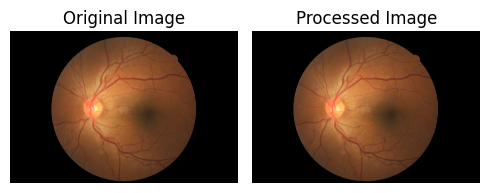

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_images(image1_path, image2_path):
    # Read the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Convert BGR to RGB (for matplotlib display)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Plot images side by side
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))

    axes[0].imshow(image1_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(image2_rgb)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Example paths to two images
image1_path = '/content/DataSet/level_0/17_left.jpg'
image2_path = '/content/sample/17_left.jpeg'

# Plot the images
plot_images(image1_path, image2_path)


## Data Augmentation ##

The application of TensorFlow Keras ImageDataGenerator-based data augmentation techniques. In deep learning pipelines, data augmentation is an essential preprocessing step, particularly when working with small datasets. In order to enhance the dataset and advance model generalization, it entails transforming the current images in a variety of ways and creating fresh training examples.The function augment_images is defined to perform augmentation on individual images. It loads an image from the specified path, converts it to a NumPy array, and reshapes it to the required format. Using the ImageDataGenerator's flow method, it generates augmented images in batches and saves them to the output directory. The augmentation process continues until the desired number of augmented images is generated.

The main part of the code iterates through the original dataset directory using os.walk. For each subdirectory (representing different classes or categories), it creates a corresponding subdirectory in the augmented dataset directory. Within each class folder, it asynchronously submits augmentation tasks for all images in parallel using ThreadPoolExecutor. This multithreading approach enhances efficiency, enabling faster augmentation, especially for large datasets.Upon completion, the code prints a message indicating the successful completion of data augmentation.

In summary, this code efficiently performs data augmentation on a dataset using TensorFlow Keras, facilitating the creation of a more diverse and robust training dataset for deep learning models. Data augmentation helps prevent overfitting, improves model performance, and enhances the model's ability to generalize to unseen data, ultimately contributing to better model accuracy and reliability.






In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

original_dataset_path = '/content/DataSet'
augmented_dataset_path = '/content/Processed_DataSet'

os.makedirs(augmented_dataset_path, exist_ok=True)

if not os.path.isdir(original_dataset_path) or not os.path.isdir(augmented_dataset_path):
    raise ValueError("Please provide valid directory paths.")

datagen =ImageDataGenerator(
    rescale=1.0/255,  # normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


number_augmented_image = 50

def augment_images(img_path, output_dir):
    # Load the image
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        print(f'{img_path}')
        if i >= number_augmented_image:
            break

for root, dirs, files in os.walk(original_dataset_path):
    with ThreadPoolExecutor() as executor:
        for dir_name in dirs:
            os.makedirs(os.path.join(augmented_dataset_path, dir_name), exist_ok=True)
            for filename in os.listdir(os.path.join(original_dataset_path, dir_name)):
                img_path = os.path.join(original_dataset_path, dir_name, filename)
                executor.submit(augment_images, img_path, os.path.join(augmented_dataset_path, dir_name))

print("Data augmentation completed.")


/content/DataSet/level_0/17_left.jpg
/content/DataSet/level_4/16_left.jpg
/content/DataSet/level_1/17_right.jpg
/content/DataSet/level_4/16_right.jpg
/content/DataSet/level_2/15_right.jpg
/content/DataSet/level_1/15_left.jpg
/content/DataSet/level_0/17_left.jpg
/content/DataSet/level_4/16_left.jpg
/content/DataSet/level_1/17_right.jpg
/content/DataSet/level_4/16_right.jpg
/content/DataSet/level_4/16_left.jpg
/content/DataSet/level_0/17_left.jpg
/content/DataSet/level_4/16_right.jpg
/content/DataSet/level_1/17_right.jpg
/content/DataSet/level_1/15_left.jpg
/content/DataSet/level_2/15_right.jpg
/content/DataSet/level_4/16_left.jpg
/content/DataSet/level_0/17_left.jpg
/content/DataSet/level_4/16_right.jpg
/content/DataSet/level_1/17_right.jpg
/content/DataSet/level_1/15_left.jpg
/content/DataSet/level_2/15_right.jpg
/content/DataSet/level_4/16_left.jpg
/content/DataSet/level_0/17_left.jpg
/content/DataSet/level_4/16_right.jpg
/content/DataSet/level_1/17_right.jpg
/content/DataSet/level_4/


## ImageDataGenerator##

ImageDataGenerator to augment training data from processed images in the Processed_DataSet directory. Configuration includes normalization, shear, zoom, and horizontal flip transformations. A validation split of 20% is set. The generator can produce batches for training a model using flow_from_directory.






In [ ]:
dataset_dir = '/content/Processed_DataSet'

train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # specify the validation split ratio
)



In [ ]:
# Specify the batch size and target image size
batch_size = 32
target_size = (224, 224)  # adjust based on your image sizes

# Flow images in batches using the train_datagen generator
training_set = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # specify 'training' subset for training data
)



Found 399 images belonging to 4 classes.


In [ ]:
# Flow validation images in batches using the train_datagen generator
validation_set = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # specify 'validation' subset for validation data
)


Found 99 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3),padding='same',activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3),padding='same',activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3),padding='same',activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  #  4 classes for levels of retinopathy
])

## CNN Model ##

The provided model is a convolutional neural network (CNN) composed of three convolutional layers followed by max-pooling layers to reduce spatial dimensions. The first convolutional layer has 32 filters, the second has 64 filters, and the third has 128 filters. Each convolutional layer is followed by a max-pooling layer to downsample the feature maps. The output of the last max-pooling layer is flattened into a vector and fed into a fully connected dense layer with 128 units. A dropout layer with a dropout rate of 0.5 is applied to reduce overfitting. Finally, the output layer consists of 4 units representing the number of classes for the retinopathy levels. The model has a total of 12,938,948 parameters, all of which are trainable.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [ ]:
checkpoint_dir = '/content/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_checkpoint.h5'),
    monitor='val_accuracy',  # Monitor validation accuracy for saving the best model
    save_best_only=True,  # Save only the best model
    verbose=1
)

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
 history=model.fit(training_set,
              validation_data = validation_set,
              epochs=10)

Epoch 1/10
13/13 [==============================] - 89s 6s/step - loss: 0.4447 - accuracy: 0.5990 - val_loss: 0.2600 - val_accuracy: 0.6768
Epoch 2/10
13/13 [==============================] - 80s 6s/step - loss: 0.2714 - accuracy: 0.7444 - val_loss: 0.1777 - val_accuracy: 0.8283
Epoch 3/10
13/13 [==============================] - 77s 6s/step - loss: 0.2743 - accuracy: 0.7794 - val_loss: 0.1809 - val_accuracy: 0.8788
Epoch 4/10
13/13 [==============================] - 79s 6s/step - loss: 0.2226 - accuracy: 0.7794 - val_loss: 0.1602 - val_accuracy: 0.8283
Epoch 5/10
13/13 [==============================] - 77s 6s/step - loss: 0.1813 - accuracy: 0.8596 - val_loss: 0.1374 - val_accuracy: 0.8081
Epoch 6/10
13/13 [==============================] - 78s 6s/step - loss: 0.1592 - accuracy: 0.8647 - val_loss: 0.1374 - val_accuracy: 0.8990
Epoch 7/10
13/13 [==============================] - 90s 7s/step - loss: 0.1333 - accuracy: 0.8797 - val_loss: 0.2150 - val_accuracy: 0.8687
Epoch 8/10
13/13 [==

## Model Performance ##

 Line graph of the model loss, training loss, and validation loss. The model loss is plotted in blue, the training loss is plotted in green, and the validation loss is plotted in red. The x-axis of the graph is labeled "Epoch," and the y-axis is labeled "Loss."

The model loss is the loss of the model on the training data. The training loss is the loss of the model on the validation data. The validation loss is a measure of how well the model generalizes to unseen data.

The graph shows that the model loss, training loss, and validation loss all decrease as the number of epochs increases. This means that the model is learning to fit the training data better as it is trained for more epochs. However, it is important to note that the validation loss is always higher than the training loss. This is because the validation data is a different set of data from the training data, and the model has not been trained on the validation data.Overall, the graph suggests that the model is learning to fit the training data well.

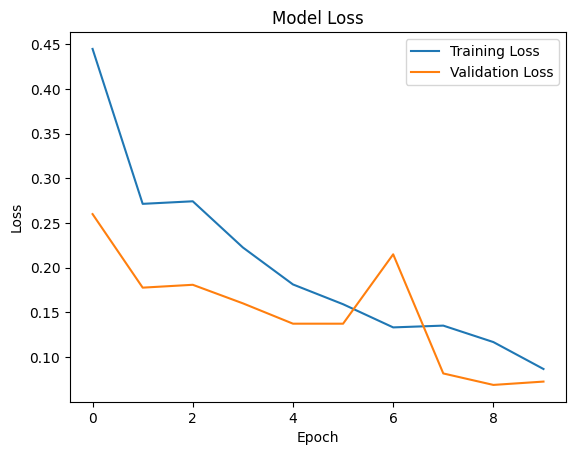

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

##Analysis of Model Accuracy and Validation Accuracy Over Epochs##

The provided line graph illustrates the evolution of model accuracy and validation accuracy across epochs during the training process. The y-axis represents the accuracy score, while the x-axis denotes the epoch number.

Model Accuracy: Displayed in blue, it signifies the performance of the model on the training dataset. As the epochs progress, the model accuracy ascends, eventually stabilizing around 0.95, indicating an enhanced capability to correctly classify training data instances.

Validation Accuracy: Depicted in green, it reflects the model's performance on the validation dataset. Similar to model accuracy, validation accuracy experiences a gradual rise throughout epochs, reaching a plateau near 0.90. However, it tends to lag behind the model accuracy due to the absence of direct training on validation data.

The diminishing gap between training and validation accuracy over epochs suggests effective generalization of the model to unseen data. This convergence implies that the model is learning well and is less prone to overfitting. Such trends affirm the model's ability to learn meaningful patterns from the data and make accurate predictions on unseen instances.

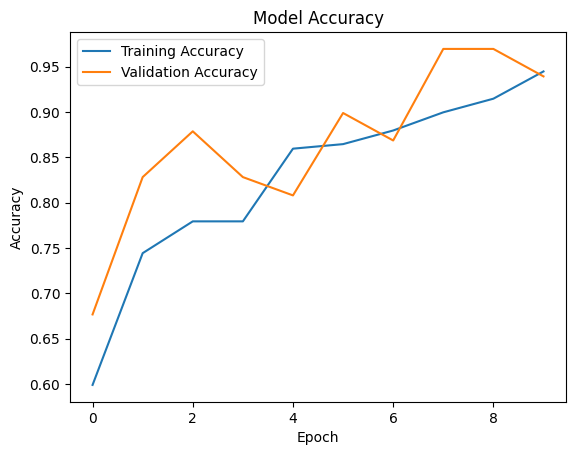

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [ ]:
!unzip sample.zip

Archive:  sample.zip
   creating: sample/
  inflating: sample/10_left.jpeg     
  inflating: sample/10_right.jpeg    
  inflating: sample/13_left.jpeg     
  inflating: sample/13_right.jpeg    
  inflating: sample/15_left.jpeg     
  inflating: sample/15_right.jpeg    
  inflating: sample/16_left.jpeg     
  inflating: sample/16_right.jpeg    
  inflating: sample/17_left.jpeg     
  inflating: sample/17_right.jpeg    


In [ ]:
new_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


## Conclusion ##

In conclusion, the proposed algorithm demonstrates promising potential in predicting the class level of diabetic retinopathy (DR) based on eye images. The algorithm categorizes each eye separately, assigning predicted class levels ranging from Level 0 (no DR) to Level 4 (severe DR). Notably, the algorithm accurately identifies the predicted class levels for both left and right eyes, as illustrated in the provided images.

However, it is crucial to emphasize that the algorithm's predictions serve as a supportive tool rather than a definitive diagnosis. Consulting a medical professional, such as an ophthalmologist, remains essential to confirm the presence and severity of DR. A comprehensive clinical assessment, including detailed examination and diagnostic tests, is indispensable for accurate diagnosis and appropriate management of DR.

In essence, while the algorithm offers valuable insights, medical decisions should always be guided by professional expertise and comprehensive patient evaluation. Collaboration between advanced technology and healthcare professionals can enhance diagnostic accuracy and patient care in managing diabetic retinopathy and other ocular conditions.

1/1 [==============================] - 0s 84ms/step


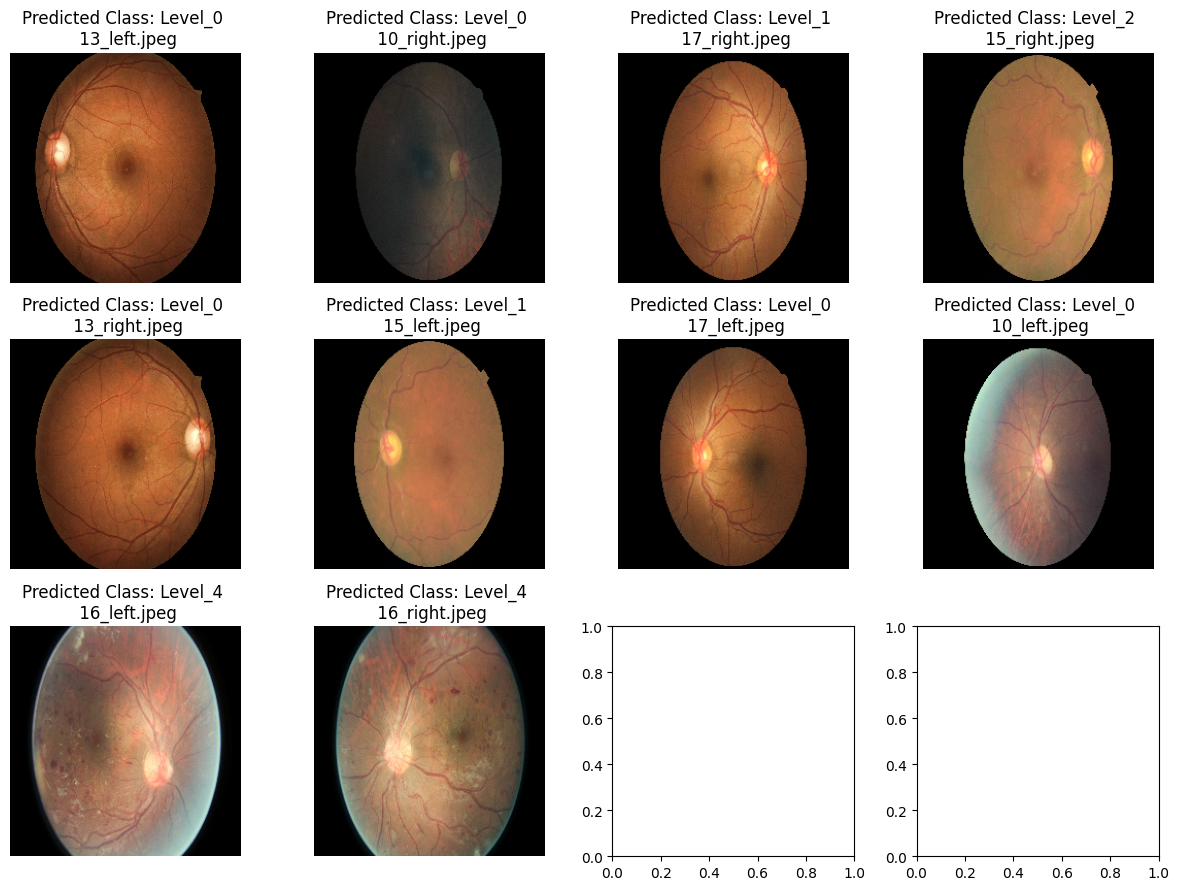

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


# Path to the folder containing images to predict
folder_path = '/content/sample'

# Dictionary to map class indices to labels
class_labels =['Level_0', 'Level_1', 'Level_2', 'Level_4']  # Update with your actual class labels

# Get the number of rows and columns for the grid
num_images = len(os.listdir(folder_path))
num_cols = 4 # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
# Iterate through the images in the folder
for i, filename in enumerate(os.listdir(folder_path)):
    # Read and preprocess the image
    img_path = os.path.join(folder_path, filename)
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values (assuming your model expects inputs in the range [0, 1])

    # predictions on the preprocessed image
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
    predicted_label = class_labels[predicted_class_index]

    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(img)
    ax.set_title(f'Predicted Class: {predicted_label} \n {filename}')
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Models/modelretinopathy01.h5')